In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv(r"uber.csv")


In [3]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)


In [7]:
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.shape


(200000, 7)

In [9]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)


In [12]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.dtypes


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


In [15]:
df.dtypes


fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
# To segregate each time of date and time
df = df.assign(hour=df['pickup_datetime'].dt.hour,
                day=df['pickup_datetime'].dt.day,
                month=df['pickup_datetime'].dt.month,
                year=df['pickup_datetime'].dt.year,
                dayofweek=df['pickup_datetime'].dt.dayofweek)


In [17]:
df = df.drop('pickup_datetime', axis=1)


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

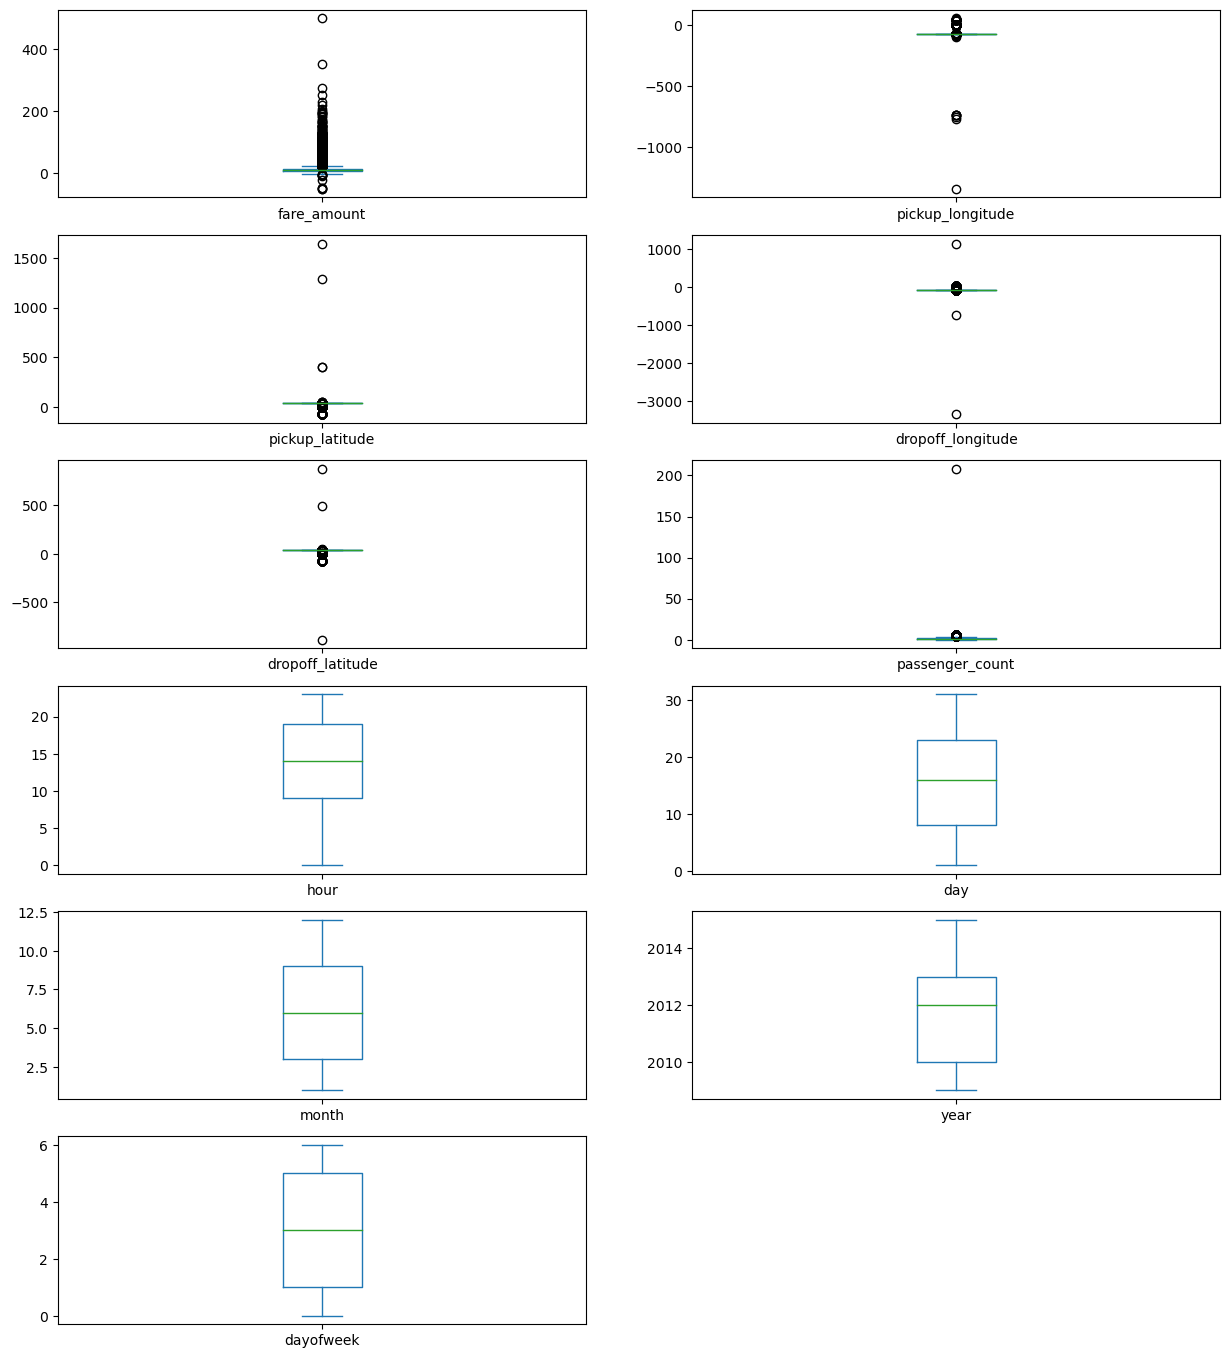

In [18]:
# Checking outliers and filling them
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))  # Boxplot to check the outliers


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

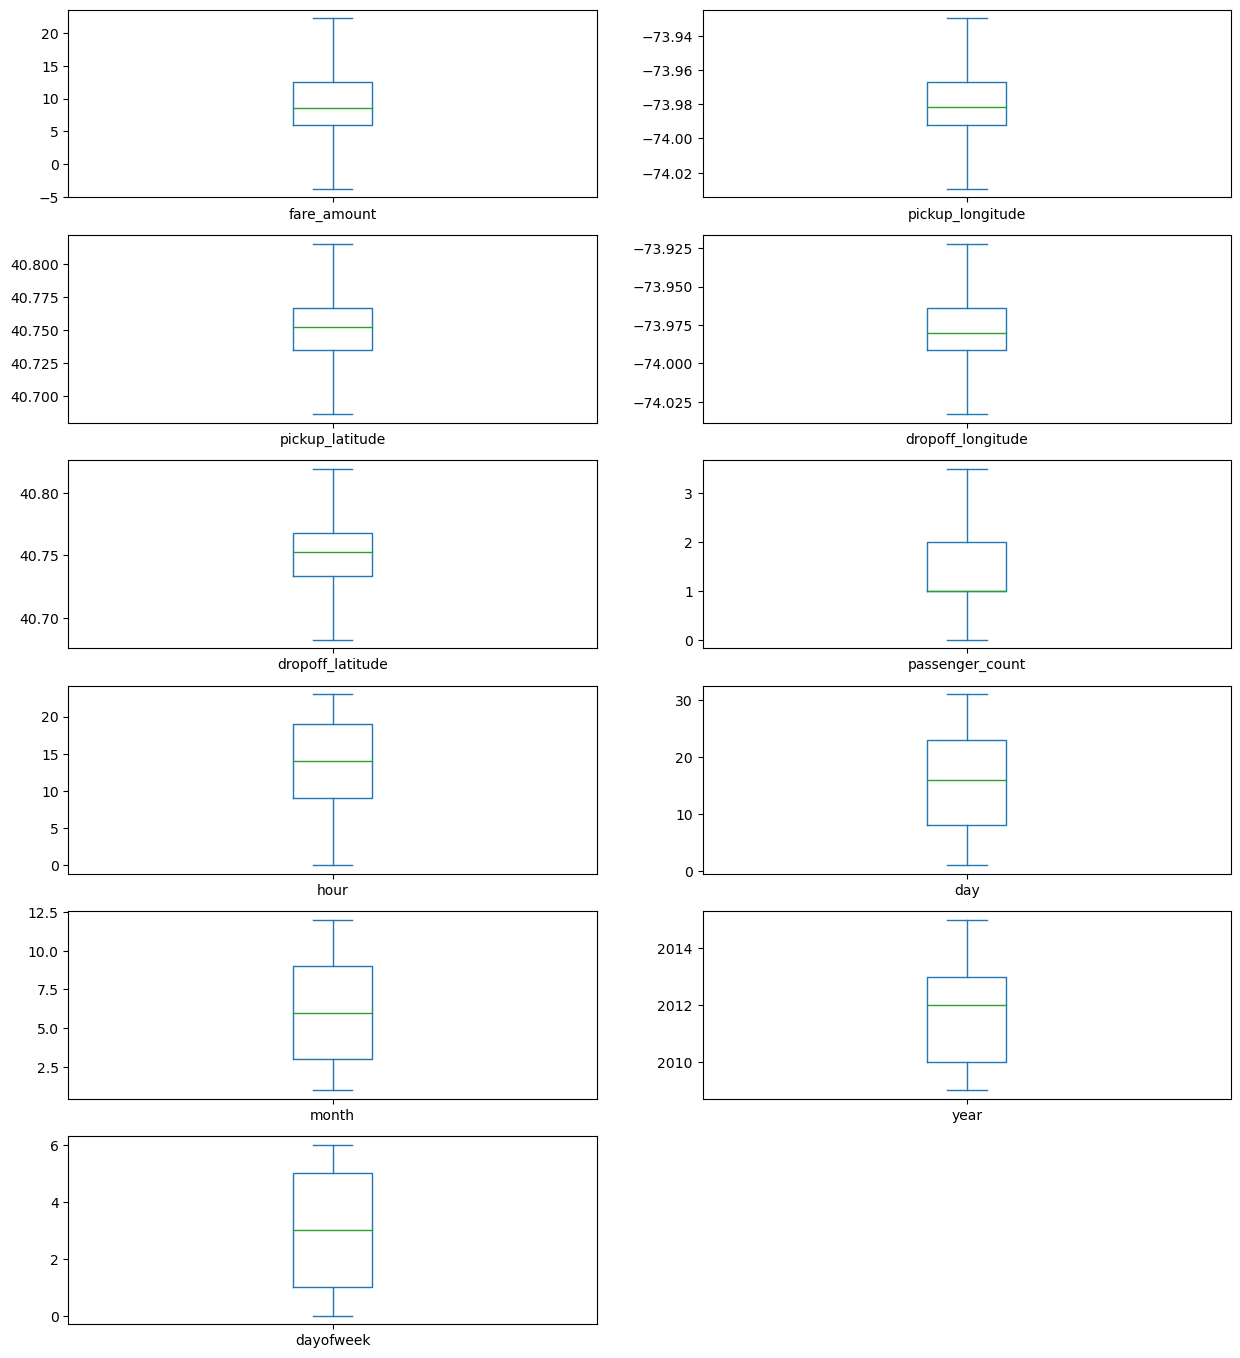

In [19]:
# Using the InterQuartile Range to fill the values
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_outliers_all(df, df.iloc[:, 0::])

# Boxplot shows that dataset is free from outliers
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))


In [20]:
import haversine as hs

travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [
        df['pickup_longitude'][pos], 
        df['pickup_latitude'][pos], 
        df['dropoff_longitude'][pos], 
        df['dropoff_latitude'][pos]]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)


In [21]:
print(travel_dist)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
df['dist_travel_km'] = travel_dist
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [23]:
# Uber doesn't travel over 130 kms so minimize the distance
df = df.loc[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (163040, 12)


In [24]:
# Finding incorrect latitude (Less than or greater than 90)
# and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
                               (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
                              ]

# Dropping incorrect coordinates
df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')


C:\Users\vishal\AppData\Local\Temp\ipykernel_1128\1134177938.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')


<Axes: >

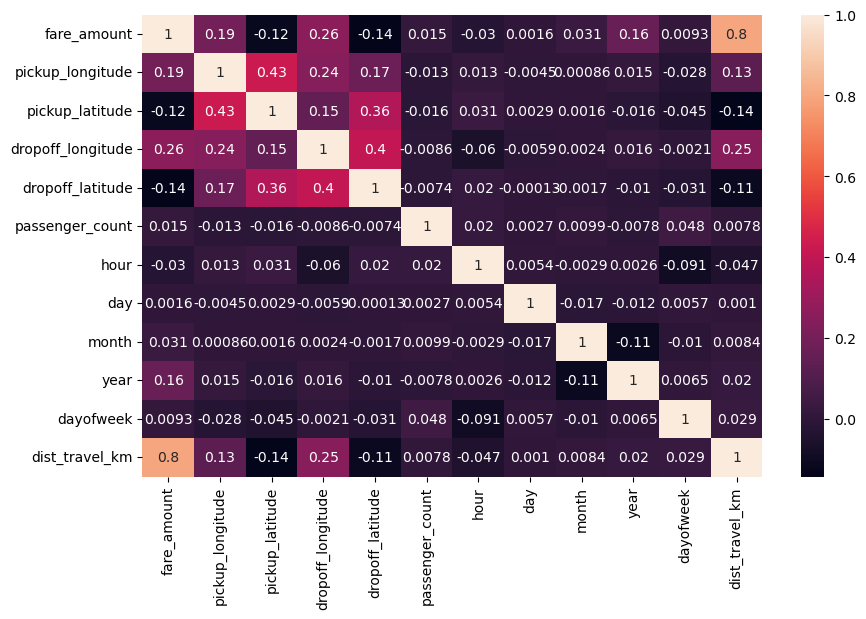

In [25]:
# Function to find the correlation
corr = df.corr()

# Function to find the correlation (Display the corr using heat map)
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True) 


In [29]:
# Dividing the dataset into feature and target values
x = df[['pickup_longitude', 
        'pickup_latitude', 
        'dropoff_longitude', 
        'dropoff_latitude', 
        'passenger_count', 
        'hour', 
        'day', 
        'month', 
        'year', 
        'dayofweek', 
        'dist_travel_km']]

# Target values
y = df['fare_amount']

# Dividing the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

X_train.shape

################ Linear Regression #######################

# Import Linear Regression from sklearn
regression = LinearRegression()

# Train the model using features and target
regression.fit(X_train, y_train)

# To find the linear intercept
regression.intercept_

# To find the linear coefficient
regression.coef_

# To predict the target values
prediction = regression.predict(X_test)
print(prediction)

# Metrics Evaluation using R2, Mean Squared Error,
# Root Mean Squared Error

R2 = r2_score(y_test, prediction)
MSE = mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)

print("R2 is : ", R2)
print("Mean Squared Error is : ", MSE)
print("Root Mean Squared Error is : ", RMSE)


[ 8.34110167  8.7704774  10.91650386 ... 13.97213612 13.51796617
 15.78458174]
R2 is :  0.677444122952767
Mean Squared Error is :  9.196431536068147
Root Mean Squared Error is :  3.03256187670889


In [30]:
################ Random Forest #######################

# Here n_estimators means number of trees you want to
# build before making the prediction
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

y_pred

# Metrics Evaluation using R2, Mean Squared Error,
# Root Mean Squared Error

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("R2 is : ", R2)
print("Mean Squared Error is : ", MSE)
print("Root Mean Squared Error is : ", RMSE)


R2 is :  0.8269773982681258
Mean Squared Error is :  4.933069350916102
Root Mean Squared Error is :  2.2210514066351776
